In [ ]:
import numpy as np


In [ ]:
import pandas as pd


In [ ]:
import matplotlib.pyplot as plt


In [ ]:
from tensorflow.keras.layers import Dense


In [ ]:
from tensorflow.keras.models import Sequential


In [ ]:
from tensorflow.keras.optimizers import RMSprop


In [ ]:
insurance_data = pd.read_csv("https://raw.githubusercontent.com/ammishra08/MachineLearning/master/Datasets/insurance.csv") #path of the raw dataset


In [ ]:
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
insurance_data.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [ ]:
insurance_data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
insurance_data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Data Pre-Processing

In [ ]:
insurance_data['sex'].unique()

array(['female', 'male'], dtype=object)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le_encoder = LabelEncoder()
insurance_data['sex'] = le_encoder.fit_transform(insurance_data['sex'])

In [ ]:
le_encoder = LabelEncoder()
insurance_data['smoker'] = le_encoder.fit_transform(insurance_data['smoker'])

In [ ]:
le_encoder = LabelEncoder()
insurance_data['region'] = le_encoder.fit_transform(insurance_data['region'])

In [ ]:
insurance_data

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


In [ ]:
insurance_data['charges']

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

<Axes: >

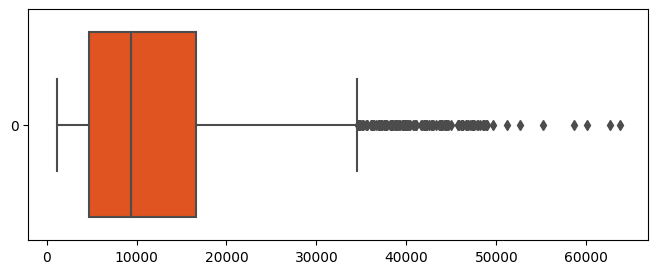

In [ ]:
import seaborn as sns
plt.figure(figsize=(8,3))
sns.boxplot(insurance_data['charges'], color = 'orangered', orient = 'h')


Handling Outliers

In [ ]:
from scipy.stats import zscore
zscore(insurance_data)

,age,sex,bmi,children,smoker,region,charges
0,-1.438764,-1.010519,-0.453320,-0.908614,1.970587,1.343905,0.298584
1,-1.509965,0.989591,0.509621,-0.078767,-0.507463,0.438495,-0.953689
2,-0.797954,0.989591,0.383307,1.580926,-0.507463,0.438495,-0.728675
3,-0.441948,0.989591,-1.305531,-0.908614,-0.507463,-0.466915,0.719843
4,-0.513149,0.989591,-0.292556,-0.908614,-0.507463,-0.466915,-0.776802
...,...,...,...,...,...,...,...
1333,0.768473,0.989591,0.050297,1.580926,-0.507463,-0.466915,-0.220551
1334,-1.509965,-1.010519,0.206139,-0.908614,-0.507463,-1.372326,-0.914002
1335,-1.509965,-1.010519,1.014878,-0.908614,-0.507463,0.438495,-0.961596
1336,-1.296362,-1.010519,-0.797813,-0.908614,-0.507463,1.343905,-0.930362


In [ ]:
insurance_data[np.abs(zscore(insurance_data['charges'])) > 3]


,age,sex,bmi,children,smoker,region,charges
34,28,1,36.400,1,1,3,51194.55914
543,54,0,47.410,0,1,2,63770.42801
577,31,0,38.095,1,1,0,58571.07448
819,33,0,35.530,0,1,1,55135.40209
1146,60,1,32.800,0,1,3,52590.82939
1230,52,1,34.485,3,1,1,60021.39897
1300,45,1,30.360,0,1,2,62592.87309


In [ ]:
insurance_data[np.abs(zscore(insurance_data['charges'])) > 3]


,age,sex,bmi,children,smoker,region,charges
34,28,1,36.400,1,1,3,51194.55914
543,54,0,47.410,0,1,2,63770.42801
577,31,0,38.095,1,1,0,58571.07448
819,33,0,35.530,0,1,1,55135.40209
1146,60,1,32.800,0,1,3,52590.82939
1230,52,1,34.485,3,1,1,60021.39897
1300,45,1,30.360,0,1,2,62592.87309


In [ ]:
np.where(z > 3)

(array([  32,   34,   71,  116,  166,  413,  425,  438,  543,  568,  577,
         640,  819,  847,  877,  932,  937,  969,  984, 1047, 1085, 1116,
        1130, 1146, 1230, 1245, 1272, 1300, 1317]),
 array([3, 6, 3, 2, 3, 3, 3, 3, 6, 3, 6, 3, 6, 2, 3, 3, 3, 3, 3, 2, 3, 3,
        3, 6, 6, 3, 3, 6, 2]))

In [ ]:
X = insurance_data.drop(['charges'], axis=1)
Y = insurance_data['charges']

<!-- ANN Regression Model -->

# Train and Test

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2, random_state=3)

Split data into train and test model


In [ ]:
from sklearn.model_selection import train_test_split
# splitting data into train & test i.e. 80% & 20% ratio
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2, random_state = 0)


# ANN Regression Model

In [ ]:
def build_model():
    model = Sequential()
    # units = num of neurons, input_shape = number of features
    model.add(Dense(units = 128, activation = 'relu', input_shape = [len(X.keys())]))
    # Hidden Layer - I
    model.add(Dense(units = 256, activation = 'relu'))
    # Hidden Layer - II
    model.add(Dense(units = 512, activation = 'relu'))
    # Output Layer - For Regression
    model.add(Dense(units = 1))
    # Optimizers (alpha)
    optimizers = RMSprop(learning_rate = 0.001)
    # Model Compilers
    model.compile(loss = 'mean_squared_error',optimizer=optimizers, metrics=['mean_squared_error',
                                                                             'mean_absolute_error'])
    return model

In [ ]:
model = build_model()

In [ ]:
model.summary()


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 128)               896       
                                                                 
 dense_21 (Dense)            (None, 256)               33024     
                                                                 
 dense_22 (Dense)            (None, 512)               131584    
                                                                 
 dense_23 (Dense)            (None, 1)                 513       
                                                                 
Total params: 166017 (648.50 KB)
Trainable params: 166017 (648.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:

# epochs = num of iterations, batch_size = sample size per iteration,
# validation_split = 20% (model test size), validation is done while training of model
history = model.fit(x_train, y_train, epochs = 600, batch_size = 30, validation_split = 0.2)

Epoch 1/600
29/29 [==============================] - 1s 14ms/step - loss: 273460000.0000 - mean_squared_error: 273460000.0000 - mean_absolute_error: 11678.1445 - val_loss: 258587408.0000 - val_mean_squared_error: 258587408.0000 - val_mean_absolute_error: 10504.9121
Epoch 2/600
29/29 [==============================] - 0s 6ms/step - loss: 153223488.0000 - mean_squared_error: 153223488.0000 - mean_absolute_error: 7918.4019 - val_loss: 148120016.0000 - val_mean_squared_error: 148120016.0000 - val_mean_absolute_error: 9138.0088
Epoch 3/600
29/29 [==============================] - 0s 6ms/step - loss: 124788888.0000 - mean_squared_error: 124788888.0000 - mean_absolute_error: 8782.6426 - val_loss: 150702320.0000 - val_mean_squared_error: 150702304.0000 - val_mean_absolute_error: 8928.6143
Epoch 4/600
29/29 [==============================] - 0s 6ms/step - loss: 124622112.0000 - mean_squared_error: 124622112.0000 - mean_absolute_error: 8703.4277 - val_loss: 143994752.0000 - val_mean_squared_erro

In [ ]:
pd.DataFrame(history.history)


<Axes: >

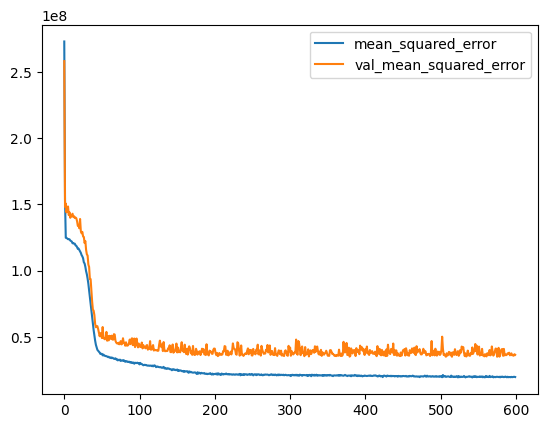

In [ ]:
pd.DataFrame(history.history)[['mean_squared_error','val_mean_squared_error']].plot()


In [ ]:

# Yhat   (representation of redicted value)
predictions = model.predict(x_test)


9/9 [==============================] - 0s 2ms/step


In [ ]:
from sklearn.metrics import r2_score
# 0-1
r2_score(y_test, predictions)

0.8455409809735023

In [ ]:
results = pd.DataFrame(predictions, columns = ['Predicted_Value'])


In [ ]:
results['Actual_Value'] = np.array(y_test)


<Axes: >

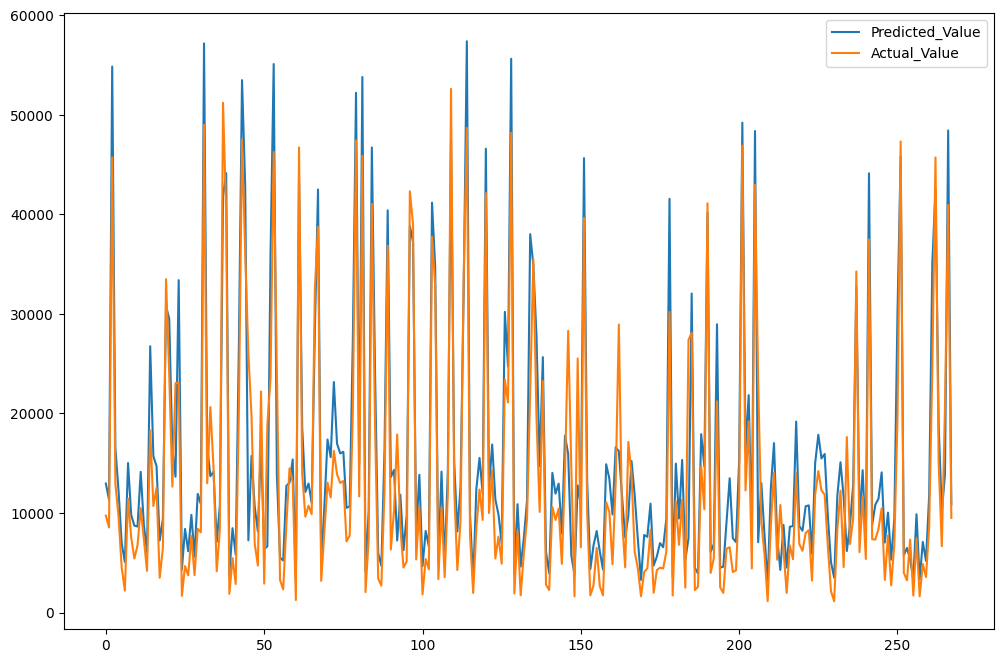

In [ ]:
results.plot(figsize=(12,8))